In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import re
from scipy.optimize import curve_fit
from scipy.constants import k as kb
from scipy.constants import N_A as NA

In [3]:
def load_file(filenm):
    """
    Load xvg - file and return a pandas dataframe. 
    """
    data = []
    with open(filenm) as f:
        for line in f:
            #If line starts with @ or #, skip
            if line.startswith(('#', '@')):
                continue
            data.append([float(x) for x in re.split(r'\s+', line.strip())])
    return pd.DataFrame(data, columns=['time', 'value'])

In [4]:
def compute_potential(A, bins=100, T=300, k=kb):
    """
    Compute potential function of parameter sampled in A from the probabillity distribution using Bolzmanns inverse law.
    """
    hist, edges = np.histogram(A, bins=bins, density=True)
    centers = (edges[:-1] + edges[1:]) / 2
    pot = -np.log(hist)*k*T
    pot *= NA/1000
    centers = centers[np.isfinite(pot)]
    pot = pot[np.isfinite(pot)]
    pot -= pot.min()
    return centers, pot



In [5]:
def proper_dihedral(phi, phi0, k, n):
    """
    Compute dihedral angle using the proper dihedral angle function.
    """
    phi = np.deg2rad(phi)
    phi0 = np.deg2rad(phi0)
    return k*(1+np.cos(n*phi-phi0))

In [6]:
def quartic_angle(theta, theta0, C2, C4):
    theta = np.deg2rad(theta)
    theta0 = np.deg2rad(theta0)
    return C2 * (theta - theta0)**2 + C4 * (theta - theta0)**4

In [7]:
def fit_param(filenm, func, p0, range=(-180, 180)):
    df = load_file(filenm)
    centers_dih4, pot_dih4 = compute_potential(df['value'])
    popt, pcov = curve_fit(func, centers_dih4, pot_dih4, p0=p0)
    plt.scatter(centers_dih4, pot_dih4, label='data')
    print(f'optimal parameters: {popt}')
    x = np.linspace(*range, 100)
    plt.plot(x, func(x, *popt), label='fit')
    plt.legend()
    plt.show()
    return popt

/tmp/ipykernel_9112/3893144688.py:7: RuntimeWarning: divide by zero encountered in log
  pot = -np.log(hist)*k*T


optimal parameters: [109.93775425  52.35119795]


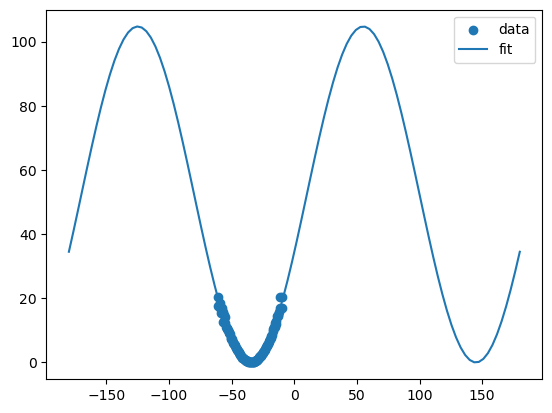

In [31]:
fn = 'reference/dihedrals_mapped/dih_3.xvg'
popt1 = fit_param(fn, lambda x, phi0, k: proper_dihedral(x, phi0, k, 2), [145,100])

optimal parameters: [-115.47101675   47.43540749]


/tmp/ipykernel_9112/3893144688.py:7: RuntimeWarning: divide by zero encountered in log
  pot = -np.log(hist)*k*T


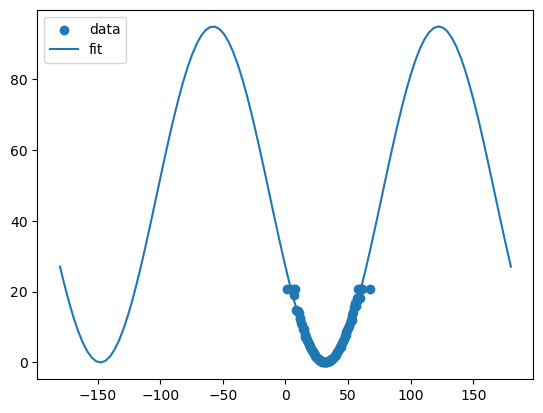

array([-115.47101675,   47.43540749])

In [21]:
fn = 'referenceB/dihedrals_mapped/dih_5.xvg'
fit_param(fn, lambda x, phi0, k: proper_dihedral(x, phi0, k, 2), [-75,100])

optimal parameters: [122.9951729]


/tmp/ipykernel_1347450/3893144688.py:7: RuntimeWarning: divide by zero encountered in log
  pot = -np.log(hist)*k*T


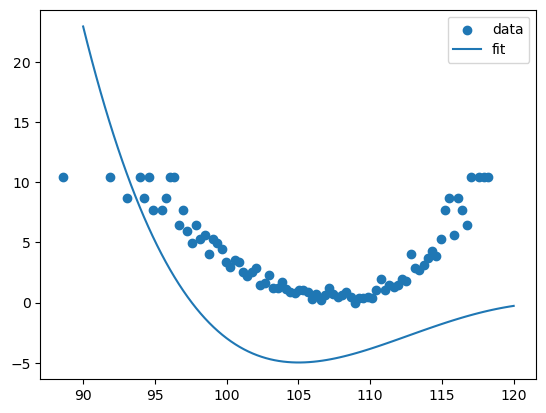

array([122.9951729])

In [22]:
fn = 'reference/angles_mapped/ang_2.xvg'
func = lambda x, theta0 : quartic_angle(x, theta0, -101, 513)
fit_param(fn, func, [140], (90,120))